# Chapter 11: Neural nets (code to produce additional figures)

In [1]:
%matplotlib inline

from pathlib import Path

import pydotplus

from IPython.display import Image
import numbers

In [2]:
def layoutGraph(dot_data, pdfFile=None):
    graph = pydotplus.graph_from_dot_data(dot_data)
    return Image(graph.create_png())

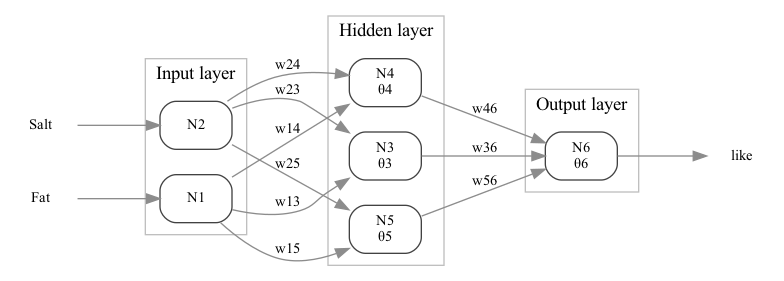

In [3]:
def unbiasedNode(id, label=None, output=None, style=None):
    label = label or f'N{id}'
    common = style or 'shape=record, style=rounded, color=gray26'
    if output is None:
        return f'{id} [ label="{label}", fontsize=11, {common} ];'
    return f'{id} [ label="{{ {label} | {output:.2f} }}", fontsize=11, {common} ];'

def biasedNode(id, bias, label=None, output=None):
    label = label or f'N{id}'
    if isinstance(bias, numbers.Number):
        bias = f'{bias:.3f}'
    if isinstance(output, numbers.Number):
        output = f'{output:.3f}'
    common = 'shape=record, style=rounded, fontsize=11, color=gray26'
    if output is None:
        return f'{id} [ label="{label}&#92;n{bias}", {common} ];'
    return f'{id} [ label="{{ {label}&#92;n{bias} | {output} }}", {common} ];'

def edge(n1, n2, weight=None):
    if weight is None:
        return f'{n1} -> {n2} [ label="w{n1}{n2}" ];'
    return f'{n1} -> {n2} [ label="{weight:.3f}" ];'

commonSettings = """
edge [ fontsize=11, color=gray55 ];
rankdir=LR;
# size="10,10"
graph [ranksep="0.8"];
"""
# node [shape=record, style=rounded, fontsize=11, color=gray26]; 

s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Salt', label='Salt', style='color=white') }
{ unbiasedNode('Fat', label='Fat', style='color=white') }
subgraph cluster_input {{ label="Input layer"; color="grey75"; 
    { unbiasedNode(2) }
    { unbiasedNode(1) }
}}
subgraph cluster_hidden {{ label="Hidden layer"; color="grey75"; 
    { biasedNode(4, '&theta;4')}
    { biasedNode(3, '&theta;3')}
    { biasedNode(5, '&theta;5')}
}}
subgraph cluster_output {{ label="Output layer"; color="grey75"; 
    { biasedNode(6, '&theta;6')}
}}
{ unbiasedNode('like', label='like', style='color=white') }
Salt -> 2;
Fat -> 1;
{ edge(1, 3) }
{ edge(2, 3) }
{ edge(1, 4) }
{ edge(2, 4) }
{ edge(1, 5) }
{ edge(2, 5) }
{ edge(3, 6) }
{ edge(4, 6) }
{ edge(5, 6) }
6 -> like
 }}
 """
layoutGraph(s, pdfFile='network-layout.pdf')

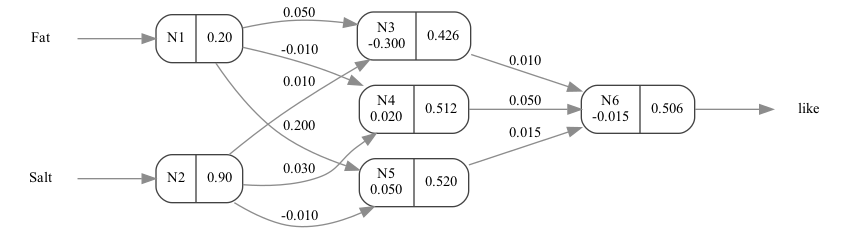

In [4]:
# Random network
s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Salt', label='Salt', style='color=white') }
{ unbiasedNode('Fat', label='Fat', style='color=white') }
{ unbiasedNode(2, output=0.9) }
{ unbiasedNode(1, output=0.2) }
{ biasedNode(4, 0.02, output=0.51224755)}
{ biasedNode(3, -0.3, output=0.42580196)}
{ biasedNode(5, 0.05, output=0.520238936)}
{ biasedNode(6, -0.015, output=0.505668252)}
{ unbiasedNode('like', label='like', style='color=white') }
Salt -> 2;
Fat -> 1;
{ edge(1, 3, 0.05) }
{ edge(2, 3, 0.01) }
{ edge(1, 4, -0.01) }
{ edge(2, 4, 0.03) }
{ edge(1, 5, 0.2) }
{ edge(2, 5, -0.01) }
{ edge(3, 6, 0.01) }
{ edge(4, 6, 0.05) }
{ edge(5, 6, 0.015) }
6 -> like
 }}
 """
layoutGraph(s, pdfFile='network-random.pdf')

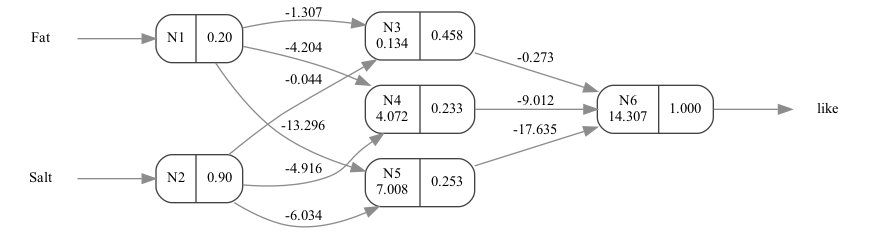

In [5]:
# Optimized network
s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Salt', label='Salt', style='color=white') }
{ unbiasedNode('Fat', label='Fat', style='color=white') }
{ unbiasedNode(2, output=0.9) }
{ unbiasedNode(1, output=0.2) }
{ biasedNode(4, 4.07247552, output=0.232750971)}
{ biasedNode(3, 0.13368045, output=0.458287289)}
{ biasedNode(5, 7.00768104, output=0.253183219)}
{ biasedNode(6, 14.30748676, output=0.99950954)}
{ unbiasedNode('like', label='like', style='color=white') }
Salt -> 2;
Fat -> 1;
{ edge(1, 3, -1.30656481) }
{ edge(2, 3, -0.04399727) }
{ edge(1, 4, -4.20427792) }
{ edge(2, 4, -4.91606924) }
{ edge(1, 5, -13.29587332) }
{ edge(2, 5, -6.03356987) }
{ edge(3, 6, -0.27348313) }
{ edge(4, 6, -9.01211573) }
{ edge(5, 6, -17.63504694) }
6 -> like
}}
 """
layoutGraph(s) 

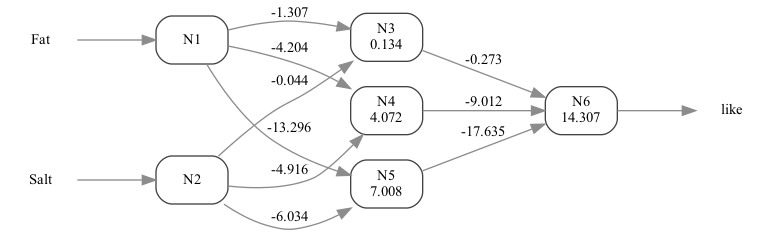

In [6]:
# Optimized network
s = f"""
digraph ethane {{
{ commonSettings }
{ unbiasedNode('Salt', label='Salt', style='color=white') }
{ unbiasedNode('Fat', label='Fat', style='color=white') }
{ unbiasedNode(2) }
{ unbiasedNode(1) }
{ biasedNode(4, 4.07247552)}
{ biasedNode(3, 0.13368045)}
{ biasedNode(5, 7.00768104)}
{ biasedNode(6, 14.30748676)}
{ unbiasedNode('like', label='like', style='color=white') }
Salt -> 2;
Fat -> 1;
{ edge(1, 3, -1.30656481) }
{ edge(2, 3, -0.04399727) }
{ edge(1, 4, -4.20427792) }
{ edge(2, 4, -4.91606924) }
{ edge(1, 5, -13.29587332) }
{ edge(2, 5, -6.03356987) }
{ edge(3, 6, -0.27348313) }
{ edge(4, 6, -9.01211573) }
{ edge(5, 6, -17.63504694) }
6 -> like
}}
 """
layoutGraph(s, pdfFile='network-optimized.pdf') 

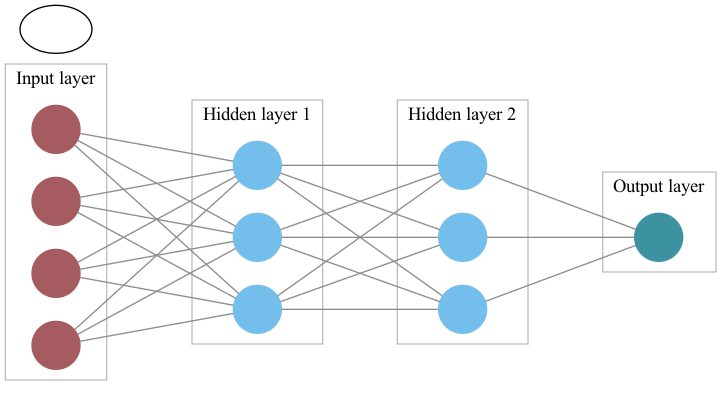

In [7]:
def node(color):
    return f'[label="", shape="circle", color="{color}", fillcolor="{color}", style="filled"]'

input = '\n'.join(f'i{i} {node("#A55B60")}; ' for i in range(4))
hidden1 = '\n'.join(f'h1{i} {node("#74BEEB")}; ' for i in range(3))
hidden2 = '\n'.join(f'h2{i} {node("#74BEEB")}; ' for i in range(3))
output = '\n'.join(f'o{i} {node("#3D92A2")}; ' for i in range(1))

def connections(layer1, count1, layer2, count2):
    s = []
    for i in range(count1):
        for j in range(count2):
            s.append(f'{layer1}{i} -- {layer2}{j} [color="gray55"];')
    return '\n'.join(s)

s = f"""
graph {{
    size="10,10"
    graph [ranksep="1"];
    rankdir=LR;
    splines=line;
    subgraph cluster_input {{ label="Input layer"; color="grey75"; { input } }}
    subgraph cluster_hidden1 {{ label="Hidden layer 1"; color="grey75"; { hidden1 } }}
    subgraph cluster_hidden2 {{ label="Hidden layer 2"; color="grey75"; { hidden2 } }}
    subgraph cluster_output {{ label="Output layer"; color="grey75"; { output } }}
    { connections('i', 4, 'h1', 3)}
    { connections('h1', 3, 'h2', 3)}
    { connections('h2', 3, 'o', 1)}
}}
"""
layoutGraph(s, pdfFile='network-4331.pdf') 

## Example 1: Tiny Dataset

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary

no display found. Using non-interactive Agg backend


In [11]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`
DATA = Path('/Users/limin/OneDrive/teaching/DS110/dmba/')
# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)

In [12]:
example_df = pd.read_csv(DATA / 'TinyData.csv')
predictors = ['Fat', 'Salt']
outcome = 'Acceptance'
X = example_df[predictors]
y = example_df[outcome]
classes = sorted(y.unique())
clf = MLPClassifier(hidden_layer_sizes=(3),
activation='logistic', solver='lbfgs',
random_state=1)
clf.fit(X, y)
clf.predict(X)
# Network structure
print('Intercepts')
print(clf.intercepts_)
print('Weights')
print(clf.coefs_)
# Prediction
print(pd.concat([
example_df,
pd.DataFrame(clf.predict_proba(X), columns=classes)
], axis=1))

Intercepts
[array([0.13368045, 4.07247552, 7.00768104]), array([14.30748676])]
Weights
[array([[ -1.30656481,  -4.20427792, -13.29587332],
       [ -0.04399727,  -4.91606924,  -6.03356987]]), array([[ -0.27348313],
       [ -9.01211573],
       [-17.63504694]])]
   Obs.  Fat  Salt Acceptance   dislike      like
0     1  0.2   0.9       like  0.000490  0.999510
1     2  0.1   0.1    dislike  0.999994  0.000006
2     3  0.2   0.4    dislike  0.999741  0.000259
3     4  0.2   0.5    dislike  0.997368  0.002632
4     5  0.4   0.5       like  0.002133  0.997867
5     6  0.3   0.8       like  0.000075  0.999925


## Example 2: Classifying Accident Severity

In [13]:
accidents_df = pd.read_csv(DATA / 'accidentsnn.csv')
accidents_df

,ALCHL_I,PROFIL_I_R,SUR_COND,VEH_INVL,MAX_SEV_IR
0,2,0,1,1,0
1,2,1,1,1,2
2,1,0,1,1,0
3,2,0,2,2,1
4,2,1,1,2,1
...,...,...,...,...,...
994,2,0,1,1,0
995,2,0,1,1,0
996,1,1,1,2,1
997,1,0,1,3,2


In [14]:
accidents_df.SUR_COND = accidents_df.SUR_COND.astype('category')
accidents_df.MAX_SEV_IR = accidents_df.MAX_SEV_IR.astype('category')
accidents_df.ALCHL_I = accidents_df.ALCHL_I.astype('category')
# convert the categorical data into dummy variables
# exclude the column for SUR_COND 9 = unknown
processed = pd.get_dummies(accidents_df, columns=['SUR_COND', 'ALCHL_I'])
processed = processed.drop(columns=['SUR_COND_9', 'ALCHL_I_2'])
outcome = 'MAX_SEV_IR'

In [15]:
processed

,PROFIL_I_R,VEH_INVL,MAX_SEV_IR,SUR_COND_1,SUR_COND_2,SUR_COND_3,SUR_COND_4,ALCHL_I_1
0,0,1,0,1,0,0,0,0
1,1,1,2,1,0,0,0,0
2,0,1,0,1,0,0,0,1
3,0,2,1,0,1,0,0,0
4,1,2,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
994,0,1,0,1,0,0,0,0
995,0,1,0,1,0,0,0,0
996,1,2,1,1,0,0,0,1
997,0,3,2,1,0,0,0,1


In [16]:
predictors = [c for c in processed.columns if c != outcome]

In [17]:
predictors

['PROFIL_I_R',
 'VEH_INVL',
 'SUR_COND_1',
 'SUR_COND_2',
 'SUR_COND_3',
 'SUR_COND_4',
 'ALCHL_I_1']

In [18]:
# partition data
X = processed[predictors]
y = processed[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

In [19]:
# training performance (use idxmax to revert the one-hotencoding)
classificationSummary(train_y, clf.predict(train_X))

Confusion Matrix (Accuracy 0.8715)

       Prediction
Actual   0   1   2
     0 331   0   1
     1   0 172   8
     2  30  38  19


In [20]:
# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.8650)

       Prediction
Actual   0   1   2
     0 218   0   1
     1   0 115   4
     2  24  25  13
